### Задание:
In this competition your task will be to predict the mean math exam result (from 0 to 100 points) for students of tutors in test.csv. You will be given two datasets: train.csv (contains all features and the target) and test.csv (only features).
You can only use these imports:
* import numpy as np
* import pandas as pd
* from sklearn.model_selection import train_test_split
* import matplotlib.pyplot as plt
* import seaborn as sns

https://www.kaggle.com/c/tutors-expected-math-exam-results

Метрика для оценки – Коэффициент детерминации:

$R^2 = 1 - \frac{\sigma^2}{\sigma_y^2}$

In [745]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [746]:
def SAVE_TO_FILE(df_, modelName,path):
    df_.to_csv(path + 'mmingalov_kaggle_math_exam(' + modelName + ').csv', index=False)

In [747]:
#стохастический градиентный спуск
def eval_sgd_model(X, y, iterations, qty_in_batch, alpha=1e-4):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    n_batch = n // qty_in_batch
    
    if n % qty_in_batch != 0:
        n_batch += 1
        
    for i in range(1, iterations+1):
        for b in range(n_batch):
            start_ = qty_in_batch*b
            end_ = qty_in_batch*(b+1)
#             print(b, n_batch, start_, end_)
            X_tmp = X[:, start_ : end_]
            y_tmp = y[start_ : end_]

            y_pred_tmp = np.dot(W, X_tmp)
            err = calc_mse(y_tmp, y_pred_tmp)

            W -= (alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp.T)))
        
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [748]:
def coef_R2(z1,y1):
    #Коэффициент детерминации
    R2 = 1 - ((z1 - y1).var() / y1.var())
    return R2

In [749]:
def calc_std_fit(x):
    res = (x - x.mean()) / x.std()
    return res

In [750]:
def calc_norm_fit(x):
    res = (x - x.min()) / (x.max() - x.min())
    return res

In [751]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [752]:
#градиентный спуск
def grad_sp(X, y, W, alpha,n,iterations):
    for i in range(iterations+1):
        y_pred = np.dot(W, X)
        #print((y_pred-y).shape, X.T.shape)
        err = calc_mse(y, y_pred)
        W -= (alpha * (1/n * 2 *np.dot(y_pred - y,X.T)))
        
        if i % (iterations/10) == 0:
            print(f'i:{i}, W:{W}, err:{err}')
            errors.append(err)
        '''if err < 3:
            #break
            return i, W, errors'''
    return i, W, errors

__загрузим датасеты__

In [753]:
PATH_FOLDER = 'D:\\Cloud\\Git\\geekbrains-data-analysis-alg\\tutors-expected-math-exam-results\\'
train = pd.read_csv(PATH_FOLDER + 'train.csv')
test = pd.read_csv(PATH_FOLDER + 'test.csv')
train['ones'] = 1 #
test['ones'] = 1 #

__посмотрим на исходные данные__

In [754]:
train.describe()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points,ones
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0
mean,4999.50000,45.878000,1.986800,1699.105000,1.719500,0.375000,0.132900,0.109600,0.053700,0.032100,0.019400,64.340800,1.0
std,2886.89568,8.043929,1.772213,524.886654,0.792264,0.484147,0.339484,0.312406,0.225436,0.176274,0.137933,13.536823,0.0
min,0.00000,23.000000,0.000000,200.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000,1.0
25%,2499.75000,40.000000,0.000000,1300.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000,1.0
50%,4999.50000,46.000000,2.000000,1500.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,63.000000,1.0
75%,7499.25000,51.000000,3.000000,2150.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,73.000000,1.0
max,9999.00000,68.000000,10.000000,3950.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000,1.0


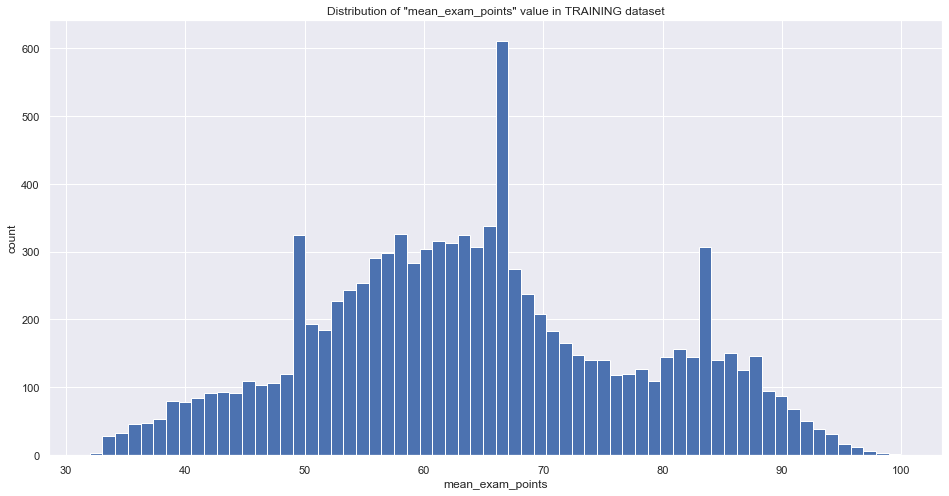

In [755]:
plt.figure(figsize = (16, 8))

train['mean_exam_points'].hist(bins=64)
plt.ylabel('count')
plt.xlabel('mean_exam_points')

plt.title('Distribution of "mean_exam_points" value in TRAINING dataset')
plt.show()

In [756]:
features = ['ones','age','years_of_experience','lesson_price','qualification','physics',
            'chemistry','biology','english','geography','history']

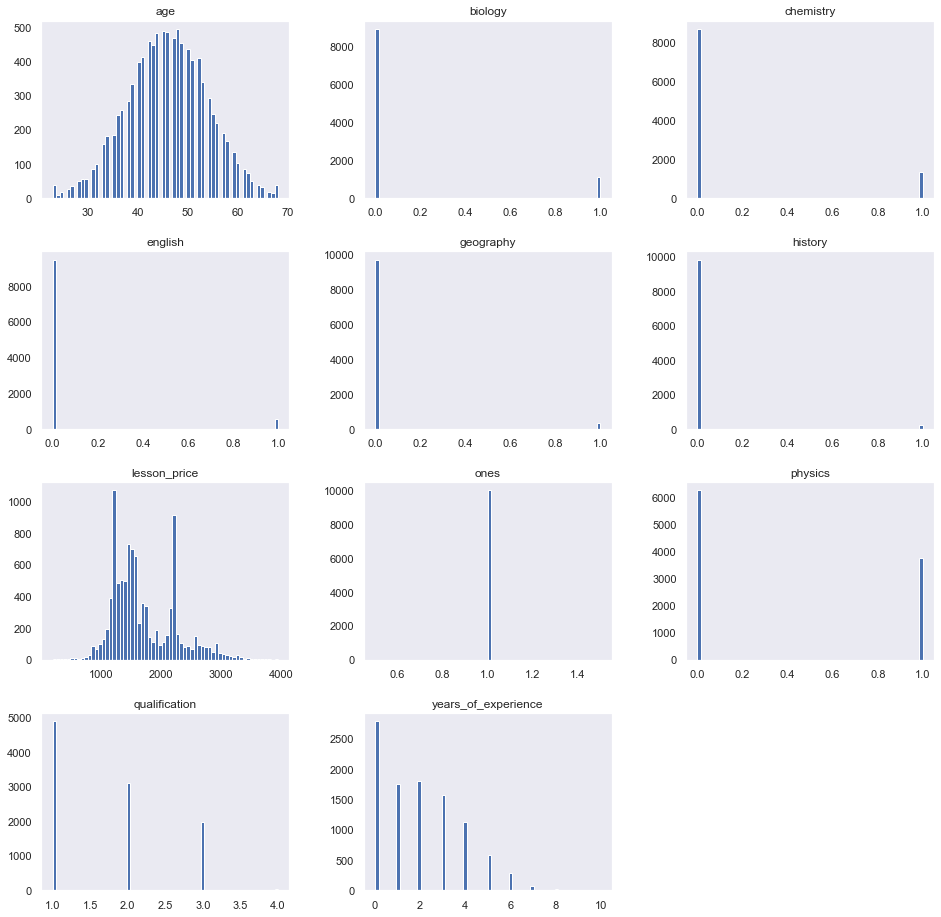

In [757]:
#train.select_dtypes(include=['float64', 'int'])
train[features].hist(figsize=(16,16), bins=64, grid=False);

__Из графиков распределений значений признаков видно, что в признаке lesson_price есть выбросы__

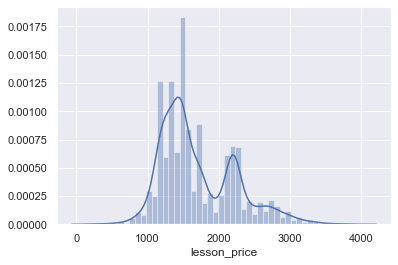

In [758]:
sns.distplot(train['lesson_price'])
#sns.boxplot(train['lesson_price'], orient='h')
#plt.show()

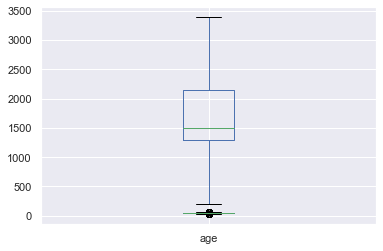

In [854]:
pd.DataFrame(train['lesson_price']).boxplot()

__Разобьемм исходные данные на обучающие и проверочный датасеты по нужным нам признакам__

In [762]:
features = ['ones','age','years_of_experience','lesson_price','qualification','physics',
            'chemistry','biology','english','geography','history']
#features = ['age','years_of_experience','lesson_price','qualification','physics','chemistry']

train_f = calc_norm_fit(train[features])# отбираем множество признаков и нормализуем
test_f = calc_norm_fit(test[features])# отбираем множество признаков и нормализуем
train_f['ones']=1 #убедимся, что не потеряли доп. признак и в нем стоят единицы
test_f['ones']=1 #убедимся, что не потеряли доп. признак и в нем стоят единицы
#train_f = calc_std_fit(train[features])# отбираем множество признаков и стандартизируем


y = train['mean_exam_points']

X_train, X_valid, y_train, y_valid = train_test_split(
    train_f, y, test_size=0.3, random_state=42)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 9069 to 7270
Data columns (total 11 columns):
ones                   7000 non-null int64
age                    7000 non-null float64
years_of_experience    7000 non-null float64
lesson_price           7000 non-null float64
qualification          7000 non-null float64
physics                7000 non-null float64
chemistry              7000 non-null float64
biology                7000 non-null float64
english                7000 non-null float64
geography              7000 non-null float64
history                7000 non-null float64
dtypes: float64(10), int64(1)
memory usage: 656.2 KB


#### Линейная регрессия. Градиентный спуск

In [763]:
n,alpha = X_train.shape[1], 1e-6
errors = []
print(n,alpha)

X_t = np.array(X_train)
#X_t = np.array(X_train_st)

W = np.array(np.random.randn(X_t.shape[1]))
print(f'X_t.shape:{X_t.shape}, W.shape:{W.shape}, W:{W}')
#y_pred = np.dot(W, X_t.T)

#градиентный спуск обычный
i, W, err = grad_sp(X_t.T, y_train, W, alpha,n,40000)
i,W,err

11 1e-05
X_t.shape:(7000, 11), W.shape:(11,), W:[ 0.19626145 -0.14098683 -2.858356    1.21687532 -0.88827159 -0.74396874
  0.97537095  1.43638937  0.27481695  0.31868466  1.08564034]
i:0, W:[ 1.01640261  0.27344409 -2.6873566   1.56292745 -0.65592326 -0.41966272
  1.08151703  1.52618546  0.31913763  0.3448719   1.10072478], err:4343.028752088142
i:4000, W:[41.75892611  3.76034704  3.76530517 27.83677545 26.57343694  5.31890887
  0.5793152   1.26491232  1.13965676  1.2000092   0.97366381], err:65.97583175805573
i:8000, W:[43.31123549  0.24791105  2.65563354 29.41913338 26.15375186  5.28273994
  0.50798     1.1898429   0.98544038  1.09936004  0.65412949], err:65.13676239571555
i:12000, W:[43.63012606 -0.68462242  2.33924503 30.27582393 25.73843535  5.27149263
  0.4843219   1.16930824  0.94726593  1.06317217  0.52121835], err:65.0509973866771
i:16000, W:[43.61492016 -0.92923977  2.23317438 30.85223504 25.4714674   5.27100515
  0.47694942  1.16413313  0.93870448  1.04730042  0.46465147], e

(40000, array([43.26592443, -0.97568129,  2.10358288, 32.1972413 , 24.87929939,
         5.27988062,  0.47224942,  1.16440623,  0.94300616,  1.02269952,
         0.41684068]), [4343.028752088142,
  65.97583175805573,
  65.13676239571555,
  65.0509973866771,
  65.0315599867103,
  65.02283945399952,
  65.01810434520128,
  65.0154528435697,
  65.01396144513153,
  65.01312201922634])

Text(0, 0.5, 'MSE')

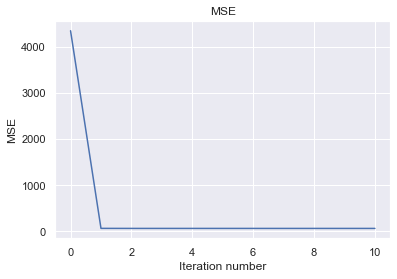

In [764]:
# Визуализируем изменение функционала ошибки
plt.plot(range(len(err)), err)
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

In [765]:
y_train_pred = np.dot(W, X_t.T)
y_train_pred

array([58.91839035, 57.75635114, 68.21504475, ..., 58.56018825,
       53.14201293, 56.41411624])

In [766]:
X_t = np.array(X_valid)
y_valid_pred = np.dot(W, X_t.T)
y_valid_pred

array([55.04085745, 56.74326048, 56.21216884, ..., 57.53501122,
       81.97217979, 57.7236877 ])

__Визуализируем спрогнозированные значения по датасетам train, valid__

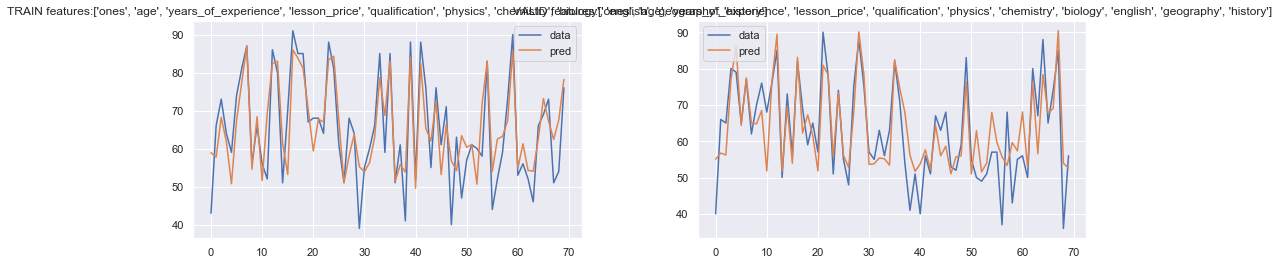

In [767]:
fig, ax = plt.subplots(nrows=1, ncols=2)
plt.subplots_adjust(wspace=0.3, hspace=0.3)
fig.set_size_inches(16, 4, forward=True)
ax1, ax2 = ax.flatten()

ax1.plot(range(0,70),y_train[:70], label = 'data')
ax1.plot(range(0,70),y_train_pred[:70], label = 'pred')
ax1.set_title(f'TRAIN features:{features}')
ax1.legend()

ax2.plot(range(0,70),y_valid[:70], label = 'data')
ax2.plot(range(0,70),y_valid_pred[:70], label = 'pred')
ax2.set_title(f'VALID features:{features}')
ax2.legend()

In [768]:
R2_train = coef_R2(y_train_pred,y_train)
R2_valid = coef_R2(y_valid_pred,y_valid)
print(f'R2_train:{R2_train}, R2_valid:{R2_valid}')


R2_train:0.646538816121127, R2_valid:0.6553653715976169


In [770]:
from sklearn.metrics import r2_score

coefficient_of_dermination = r2_score(y_train, y_train_pred)
coefficient_of_dermination

0.6465388147778521

### применим данную модель для датасета test

In [773]:
%%time
#финальный набор test, который нужно посчитать
#финальный набор test, который нужно посчитать
X_t = np.array(test_f)
y_test_pred = np.dot(W, X_t.T)
y_test_pred

Wall time: 999 µs


array([50.979049  , 65.55528066, 59.4173327 , ..., 51.62752564,
       63.97950478, 72.38022498])

In [774]:
#СОХРАНЯЕМ
df = pd.DataFrame(y_test_pred)
df.columns = ['mean_exam_points']
df['Id'] = range(10000,len(df)+10000)
df_save = df[['Id','mean_exam_points']]
SAVE_TO_FILE(df_save,'lr-gs-source', PATH_FOLDER)

#### Полученные результат является удовлетворительным, однако его можно улучшить за счет обработки исходных данных. Попробуем решить проблему выбросов в признаке lesson_price

In [855]:
PATH_FOLDER = 'D:\\Cloud\\Git\\geekbrains-data-analysis-alg\\tutors-expected-math-exam-results\\'
train = pd.read_csv(PATH_FOLDER + 'train.csv')
test = pd.read_csv(PATH_FOLDER + 'test.csv')
train['ones'] = 1 #
test['ones'] = 1 #

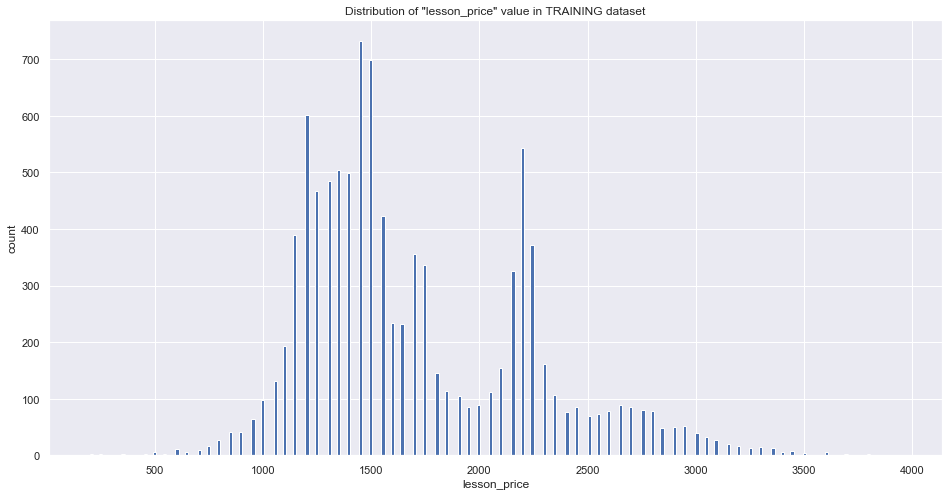

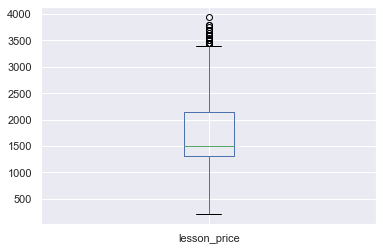

In [856]:
plt.figure(figsize = (16, 8))

train['lesson_price'].hist(bins=256)
plt.ylabel('count')
plt.xlabel('lesson_price')

plt.title('Distribution of "lesson_price" value in TRAINING dataset')
plt.show()
pd.DataFrame(train['lesson_price']).boxplot()

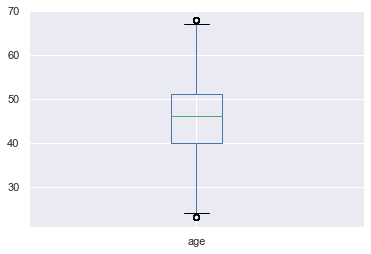

In [857]:
pd.DataFrame(train['age']).boxplot()

In [858]:
# интерквартильный размах
def IQ_processing(df_, list_):
    for i in list_:
        c = i
        IQP = IQ_param_get(df_,c)
        print(c,IQP)
        df_[(df_[c] < IQP['low_border']) | (df_[c]> IQP['high_border'])]
        df_.loc[df_[c] > IQP['high_border'], c] = IQP['median']
        df_.loc[df_[c] < IQP['low_border'], c] = IQP['median']
        print('count after procesing:',df_[(df_[c] < IQP['low_border']) | (df_[c]> IQP['high_border'])][c].count())

In [859]:
# Обработка выбросов -- медианы для значений за пределами 
def IQ_param_get(df_, column_):
    m = df_[column_].median()
    c = column_
    IQ=df_[c].describe()['75%']-df_[c].describe()['25%']
    
    low_border=df_[c].describe()['25%']-IQ*1.5
    
    high_border=df_[c].describe()['75%']+IQ*1.5
 
    count1 = df_[(df_[c] < low_border) | (df_[c]> high_border)][c].count()
    
    result = {
        'IQ':IQ,
        'low_border':low_border,
        'high_border':high_border,
        'count': count1,
        'median': m
    }
    return result

__обработка выбросов__

In [860]:
# интерквартильный размах
list = ['lesson_price','age']
print('processing dataframe train')
IQ_processing(train, list)
#print('processing dataframe test')
#IQ_processing(test, list)

processing dataframe train
lesson_price {'IQ': 850.0, 'low_border': 25.0, 'high_border': 3425.0, 'count': 25, 'median': 1500.0}
count after procesing: 0
age {'IQ': 11.0, 'low_border': 23.5, 'high_border': 67.5, 'count': 77, 'median': 46.0}
count after procesing: 0


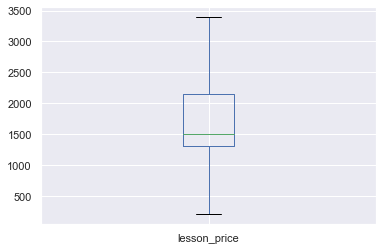

In [861]:
pd.DataFrame(train['lesson_price']).boxplot()

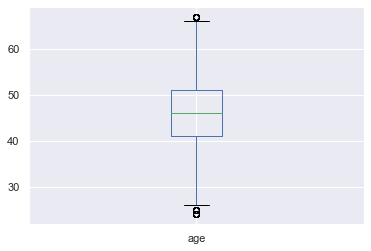

In [862]:
pd.DataFrame(train['age']).boxplot()

In [869]:
features = ['ones','age','years_of_experience','lesson_price','qualification','physics',
            'chemistry','biology','english','geography','history']
#features = ['ones','years_of_experience','qualification','physics']

train_f = calc_norm_fit(train[features])# отбираем множество признаков и нормализуем
test_f = calc_norm_fit(test[features])# отбираем множество признаков и нормализуем
train_f['ones']=1 #убедимся, что не потеряли доп. признак и в нем стоят единицы
test_f['ones']=1 #убедимся, что не потеряли доп. признак и в нем стоят единицы
#train_f = calc_std_fit(train[features])# отбираем множество признаков и стандартизируем


y = train['mean_exam_points']

X_train, X_valid, y_train, y_valid = train_test_split(
    train_f, y, test_size=0.3, random_state=42)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 9069 to 7270
Data columns (total 11 columns):
ones                   7000 non-null int64
age                    7000 non-null float64
years_of_experience    7000 non-null float64
lesson_price           7000 non-null float64
qualification          7000 non-null float64
physics                7000 non-null float64
chemistry              7000 non-null float64
biology                7000 non-null float64
english                7000 non-null float64
geography              7000 non-null float64
history                7000 non-null float64
dtypes: float64(10), int64(1)
memory usage: 656.2 KB


In [870]:
n,alpha = X_train.shape[1], 1e-6
errors = []
print(n,alpha)

X_t = np.array(X_train)
#X_t = np.array(X_train_st)

W = np.array(np.random.randn(X_t.shape[1]))
print(f'X_t.shape:{X_t.shape}, W.shape:{W.shape}, W:{W}')
#y_pred = np.dot(W, X_t.T)

#градиентный спуск обычный   65.013
i, W, err = grad_sp(X_t.T, y_train, W, alpha,n,40000)
i,W,err

11 1e-06
X_t.shape:(7000, 11), W.shape:(11,), W:[ 1.29667303  0.43781843 -0.98200757  0.71988823  0.74943988  0.97262722
 -0.5582355   0.24962827 -0.23422375 -3.32849365 -0.92664202]
i:0, W:[ 1.37596264  0.47787514 -0.96554592  0.75889057  0.77186118  1.00352239
 -0.54775553  0.25845482 -0.22990689 -3.32581969 -0.92513965], err:4058.492183423792
i:4000, W:[37.28081357 15.86494819  6.52088313 21.02878145 15.65526293  8.67264691
  2.69588399  3.11763139  1.55432049 -1.69583664 -0.21037703], err:90.07004370158228
i:8000, W:[37.81385317 13.46983044  6.40482543 23.15666518 19.21570217  6.33701537
  1.76759729  2.35986552  1.43749287 -1.28752455 -0.16962068], err:77.77754999683184
i:12000, W:[38.16779469 11.38207306  6.11556726 24.4886014  21.44215818  5.60204717
  1.24488698  1.89866041  1.34384922 -0.94908987 -0.13546286], err:72.80748927239642
i:16000, W:[38.51344664  9.62383232  5.77010562 25.37147097 22.85482115  5.3849836
  0.95844299  1.62744301  1.27210563 -0.66148254 -0.10283524], e

(40000, array([40.60752543,  3.57956995,  4.02708281, 27.23293254, 25.09878116,
         5.31691146,  0.61610102,  1.26589655,  1.06408487,  0.38406292,
         0.0721922 ]), [4058.492183423792,
  90.07004370158228,
  77.77754999683184,
  72.80748927239642,
  70.2695274539631,
  68.80005436859656,
  67.87296873735585,
  67.24944935720653,
  66.81041480508247,
  66.49155365790071,
  66.25530078408036])